In [19]:
import scipy
import numpy as np
import torch
from torch import tensor
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_model
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.optim import optimize_acqf
import botorch.acquisition as acqf
from CustomEI import ExpectedImprovementPerSecond
from matplotlib import pyplot as plt
%matplotlib inline

# Bayesian Optimization

In [20]:
def f(X, noise=0): #0.05
    X = X/5
    return (X**2 * torch.sin(5 * np.pi * X)**6.0)

X = torch.arange(0, 5, 0.01)
y = f(X)

## One-dimensional example

iteration:       0
_______________________
next sample:  tensor([[3.2245]])
current value:   tensor([[0.0309]])

iteration:       1
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.2586]])
current value:   tensor([[0.1061]])

iteration:       2
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.5632]])
current value:   tensor([[0.7394]])

iteration:       3
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.7539]])
current value:   tensor([[0.1049]])

iteration:       4
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.4991]])
current value:   tensor([[0.8096]])

iteration:       5
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.4924]])
current value:   tensor([[0.8059]])

iteration:       6
_______________________
next sample:  tensor([[2.2567]])
current value:   tensor([[0.0288]])



C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" 

iteration:       7
_______________________
next sample:  tensor([[1.6391]])
current value:   tensor([[0.0594]])

iteration:       8
_______________________
next sample:  tensor([[0.2853]])
current value:   tensor([[0.0007]])



C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" 

iteration:       9
_______________________
next sample:  tensor([[2.7444]])
current value:   tensor([[0.0418]])

iteration:       10
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[3.6553]])
current value:   tensor([[0.2540]])

iteration:       11
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.4628]])
current value:   tensor([[0.7647]])

iteration:       12
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" 

next sample:  tensor([[1.3247]])
current value:   tensor([[0.0269]])

iteration:       13
_______________________
next sample:  tensor([[0.6296]])
current value:   tensor([[0.0095]])

iteration:       14
_______________________
next sample:  tensor([[0.]])
current value:   tensor([[0.]])



C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" 

iteration:       15
_______________________
next sample:  tensor([[3.8859]])
current value:   tensor([[0.0011]])

iteration:       16
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" 

next sample:  tensor([[1.9523]])
current value:   tensor([[1.6932e-06]])

iteration:       17
_______________________
next sample:  tensor([[2.5074]])
current value:   tensor([[0.2511]])

iteration:       18
_______________________


C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


next sample:  tensor([[4.9863]])
current value:   tensor([[6.3141e-09]])

iteration:       19
_______________________
next sample:  

C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


tensor([[3.4505]])
current value:   tensor([[0.4427]])



C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(X, y, 'b', c=colors.pop(0))
C:\Users\Vincent\AppData\Local\Temp/ipykernel_3272/2823431708.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  ax.plot(X_samples, y_samples, 'k*', color='red')


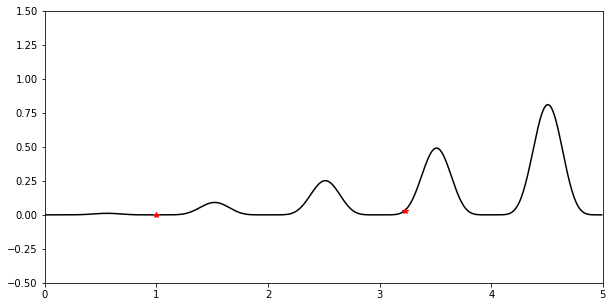

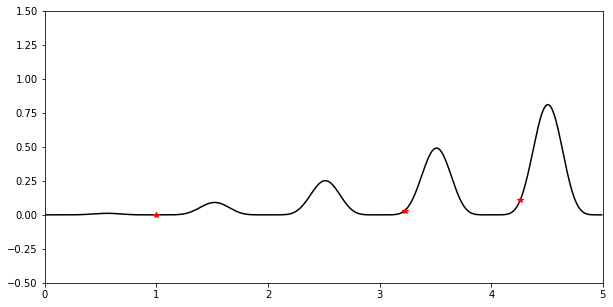

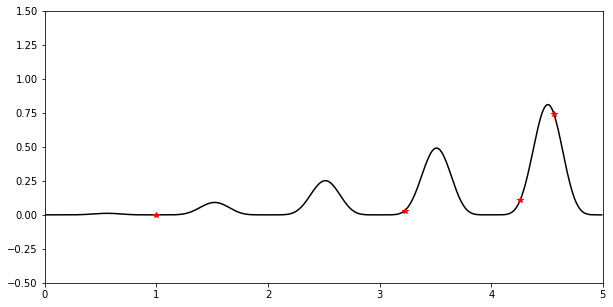

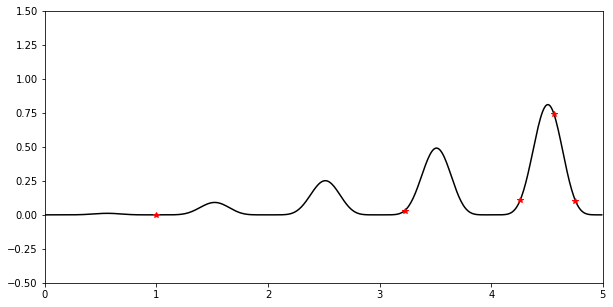

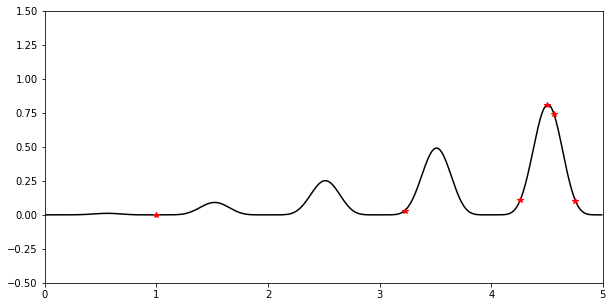

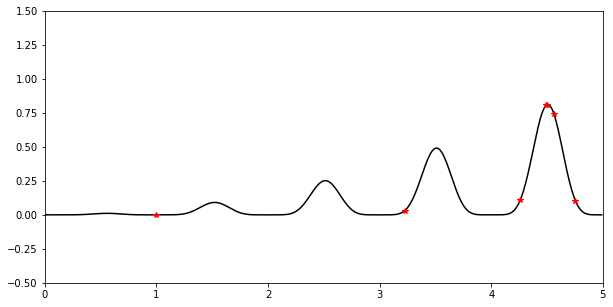

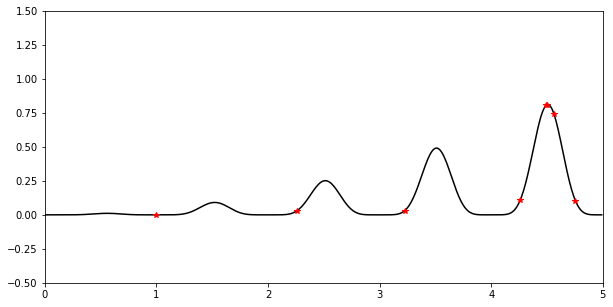

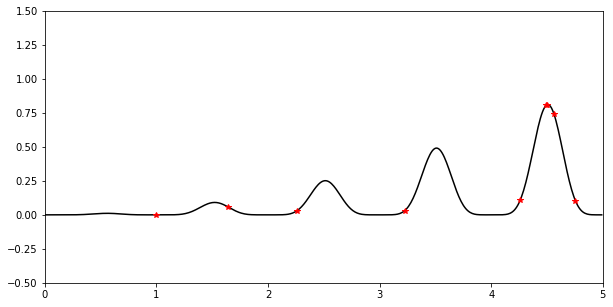

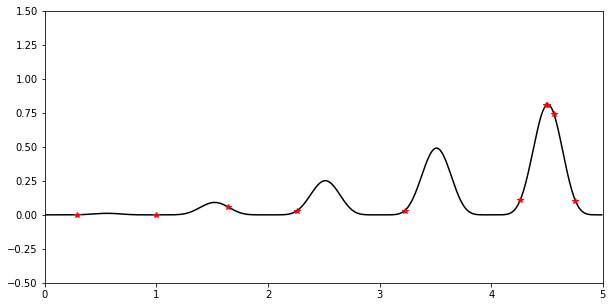

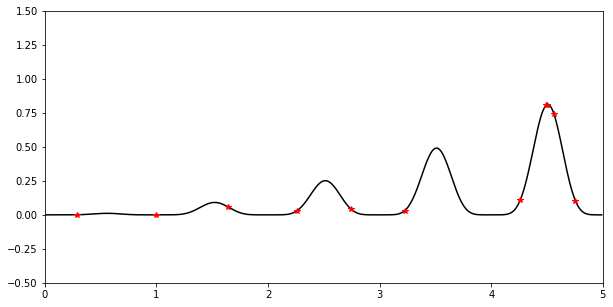

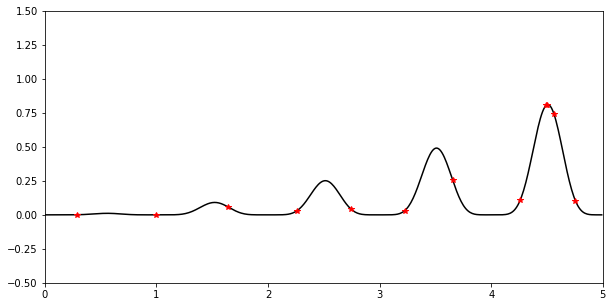

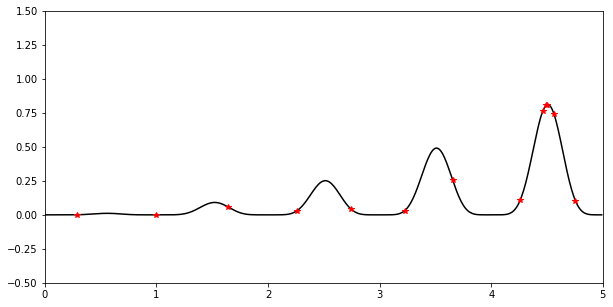

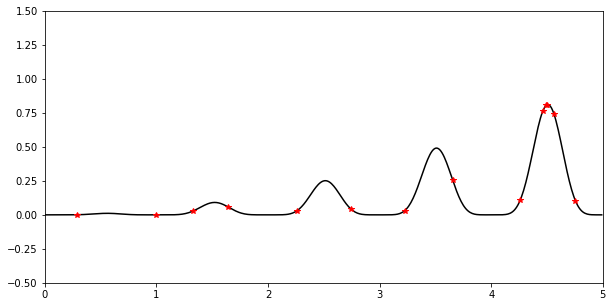

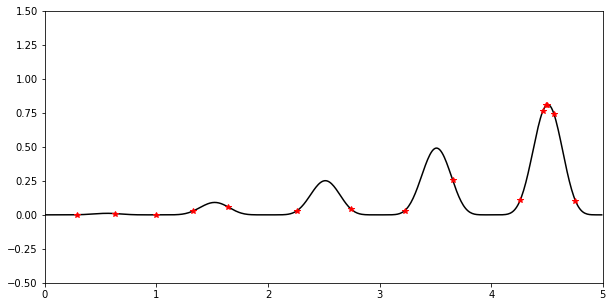

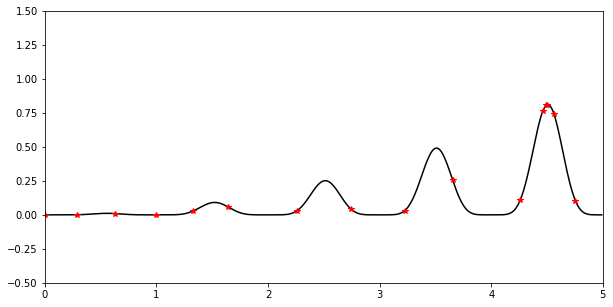

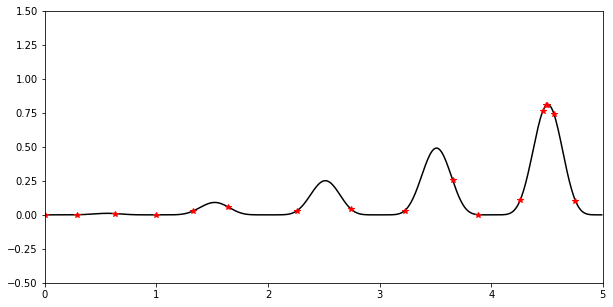

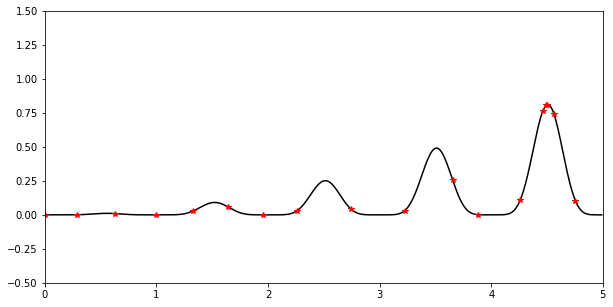

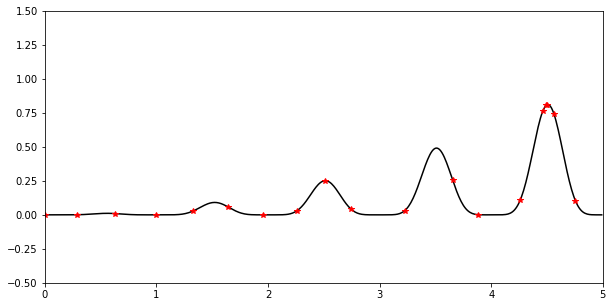

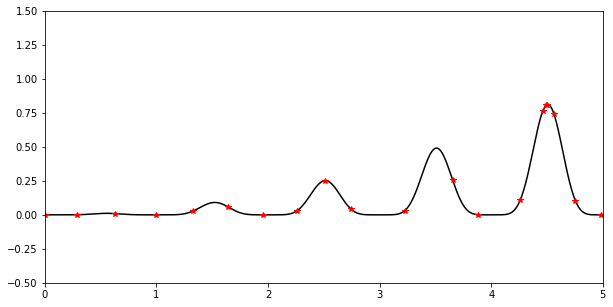

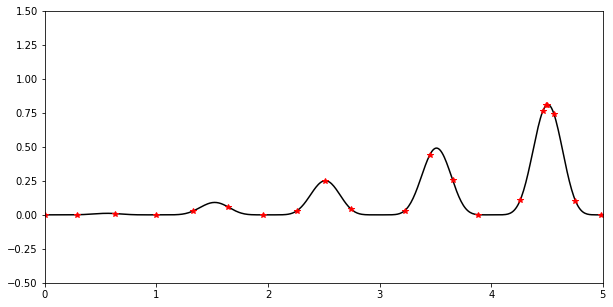

In [21]:

bounds = tensor([[0.], [5.]])
#X_samples, y_samples = bo.optimize(f, bounds=bounds, X_samples=torch.rand(2, 1), aq_func="EI", n_iter=10)

X_samples=tensor([[1.]])
y_samples=f(X_samples)
for i in range(10):
    print("=======================")
    print("iteration:      ", i)
    print("_______________________")
    gp = SingleTaskGP(X_samples, y_samples)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_model(mll)

    EI = ExpectedImprovementPerSecond(
        gp,
        y_samples.max(),
        X_samples,
        maximize=True
    )

    candidate, acq_value = optimize_acqf(
        EI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
    )

    print("next sample: ", candidate)
    y_new_sample = f(candidate)
    print("current value:  ", y_new_sample)
    
    X_samples = torch.vstack((X_samples, candidate))
    y_samples = torch.vstack((y_samples, y_new_sample))
    print("")

    p, ax = plt.subplots(1, 1, figsize=(10, 5))
    colors=['black', 'goldenrod', 'mediumpurple', 'seagreen', 'turquoise', 'orange', 'blue', 'darkseagreen']
    
    ax.plot(X, y, 'b', c=colors.pop(0))
    #ax.plot(sample_range, y_noise, 'b', c=colors.pop(0))
    
    # mean and var
    #ax.plot(sample_range, bo.mean, 'b', c=colors.pop(0))
    #ax.fill_between(sample_range.flatten(), (bo.mean - bo.var).flatten(), (bo.mean + bo.var).flatten(), alpha=0.5, color='red')
    
    # aquisition func
    #ax.plot(X, bo.aquisition, 'b', c=colors.pop(0))
    
    # samples
    ax.plot(X_samples, y_samples, 'k*', color='red')
    
    plt.xlim(0, 5)
    plt.ylim(-0.5, 1.5)
    plt.plot()
    

## Multidimensional Example

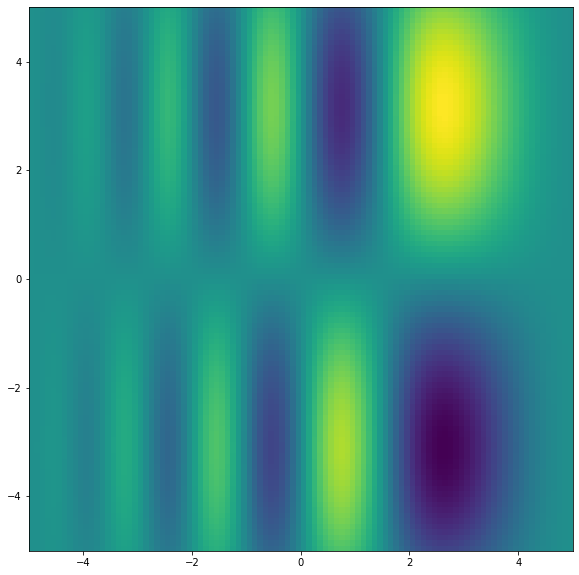

In [22]:
def f(X, Y):
	return (X+5) * torch.sin(((X-5)/2)**2) * torch.sin(Y/2)
    #return (X+5) * torch.sin(((X-5)/2)**2)

x_coord = torch.arange(-5, 5, 0.1)
y_coord = torch.arange(-5, 5, 0.1)
x_grid, y_grid = torch.meshgrid(x_coord, y_coord)
grid = torch.rot90(torch.stack((x_grid, y_grid), 2))
p, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(f(grid[:,:,0], grid[:,:,1]), extent=[-5, 5, -5, 5])

In [23]:
def UCB(gp: SingleTaskGP, X, beta=2):
    posterior = gp.posterior(X)
    vals = posterior.mean + beta * posterior.variance
    return torch.sum(vals, 1)

def PI(gp: SingleTaskGP, X, x_best, eps:float=2):
    posterior = gp.posterior(X)
    inner = (posterior.mean-x_best-eps)/posterior.variance
    vals = scipy.stats.norm.cdf(inner.detach().numpy())
    return torch.sum(tensor(vals), 1)

def optimize_acqf_custom(gp, X, x_best):
    #return X[torch.argmax(UCB(gp, X))]
    return  X[torch.argmax(PI(gp, X, x_best))]

In [24]:
bounds = tensor([[-5., -5.], [5., 5.]])

X = grid.reshape(100*100, 2)

#X_samples, y_samples = bo.optimize(f, bounds=bounds, X_samples=torch.rand(2, 1), aq_func="EI", n_iter=10)

X_samples=tensor([[0., 0.], [2., 2.]])
y_samples=f(X_samples[:,0], X_samples[:,1]).reshape(-1, 1)
print(X_samples)
print(y_samples)
for i in range(0):
    print("=======================")
    print("iteration:      ", i)
    print("_______________________")
    gp = SingleTaskGP(X_samples, y_samples)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_model(mll)
    
    EI = acqf.qExpectedImprovement(gp, y_samples.max())
    candidate, acq_value = optimize_acqf(
        EI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
    )
    #x_best = y_samples.max()
    #candidate = optimize_acqf_custom(gp, X, x_best)
    print("next sample location: ", candidate)
    
    y_new_sample = f(candidate[0][0], candidate[0][1])
    print("current value:  ", y_new_sample)
    
    X_samples = torch.vstack((X_samples, candidate))
    y_samples = torch.vstack((y_samples, y_new_sample))
    print("")

   
    p, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.scatter(X_samples[:, 0], X_samples[:, 1], color='red')

    ax.imshow(f(grid[:,:,0], grid[:,:,1]), extent=[-5, 5, -5, 5])

    #acq = PI(gp, X, x_best).reshape(100, 100).detach().numpy()
    #ax.imshow(acq, extent=[-5, -2, -5, -2])
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.plot()
    

tensor([[0., 0.],
        [2., 2.]])
tensor([[-0.0000],
        [4.5831]])
